<a href="https://colab.research.google.com/github/Jahnavi-Manchineella/LangGraph-ChatBot-/blob/main/LangGraph(ChatBot)1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langgraph langsmith

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.9/130.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.2 MB/s eta 0:00:00


In [ ]:
!pip install langchain langchain_groq langchain_community


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.3/414.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.31
    Uninstalling langchain-core-0.3.31:
      Successfully uninstalled langchain-core-0.3.31
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.5
    Uninstalling langchain-text-splitters-0.3.5:
      Successfully uninstalled langchain-text-splitters-0.3.5
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.15
    Uninstalling langchain-0.3.15:
      Successfully uninstalled langchain-0.3.15


In [ ]:
from google.colab import userdata
groq_api_key = userdata.get('groq_api_key')
langsmith = userdata.get('Langsmith_api_key')

In [ ]:
import os
os.environ["Langsmith_api_key"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "Courselanggraph"

In [ ]:
from langchain_groq import ChatGroq

In [ ]:
llm = ChatGroq(groq_api_key=groq_api_key , model_name = "gemma2-9b-it")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x78b83ba1eed0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x78b83ba52e90>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

# Start building chatbot using LangGraph

# ***PART 1***

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from  langgraph.graph import StateGraph, START,END
from langgraph.graph.message import add_messages


In [ ]:
class State(TypedDict):# messages have type "list" .`add_messages` function in the annotation defines how this state key should be updated (in this case , it appends messages to the list , rather than overwriting them  )
  messages:Annotated[list , add_messages]
graph_builder = StateGraph(State)


In [ ]:
graph_builder

In [ ]:
def chatbot(state:State):
  return{"messages":llm.invoke(state['messages'])}

In [ ]:
graph_builder.add_node("ChatBot", chatbot)

In [ ]:
graph_builder

In [ ]:
graph_builder.add_edge(START,"ChatBot")
graph_builder.add_edge("ChatBot",END)

In [ ]:
graph = graph_builder.compile()

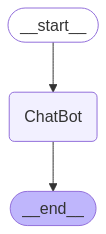

In [ ]:
from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass


In [ ]:
while True:
  user_input = input("User: ")
  if  user_input.lower()in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print('Assistant:', value["messages"].content)

User: hello!!!


/usr/local/lib/python3.11/dist-packages/langsmith/client.py:253: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


dict_values([{'messages': AIMessage(content='Hello! 👋  What can I do for you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 11, 'total_tokens': 27, 'completion_time': 0.029090909, 'prompt_time': 0.001915526, 'queue_time': 0.10065752, 'total_time': 0.031006435}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-9e56a25a-bb32-461b-bd49-19d48ca15469-0', usage_metadata={'input_tokens': 11, 'output_tokens': 16, 'total_tokens': 27})}])
content='Hello! 👋  What can I do for you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 11, 'total_tokens': 27, 'completion_time': 0.029090909, 'prompt_time': 0.001915526, 'queue_time': 0.10065752, 'total_time': 0.031006435}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-9e56a25a-bb32-461b-bd

User: can you give me a roadmap for learning gen Ai?


dict_values([{'messages': AIMessage(content='## Roadmap for Learning Generative AI\n\nThis roadmap provides a structured path to understanding and working with Generative AI.  \n\n**I. Foundations (2-4 weeks)**\n\n* **Machine Learning Basics:**\n    * Understand supervised, unsupervised, and reinforcement learning.\n    * Learn about common algorithms: linear regression, logistic regression, decision trees, support vector machines, k-nearest neighbors.\n    * Get familiar with evaluation metrics: accuracy, precision, recall, F1-score.\n* **Deep Learning Fundamentals:**\n    * Grasp the concepts of artificial neural networks (ANNs), layers, activation functions, backpropagation.\n    * Learn about popular deep learning architectures: convolutional neural networks (CNNs), recurrent neural networks (RNNs), transformer networks.\n    * Explore deep learning frameworks like TensorFlow or PyTorch.\n* **Python Programming:**\n    * Master the basics of Python syntax, data structures, and libr

User: thanks
dict_values([{'messages': AIMessage(content="You're welcome! Is there anything else I can help you with? 😊\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 11, 'total_tokens': 30, 'completion_time': 0.034545455, 'prompt_time': 0.001928186, 'queue_time': 0.137302921, 'total_time': 0.036473641}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-a119d7a0-2f60-41e9-8ee3-1b416166bb6b-0', usage_metadata={'input_tokens': 11, 'output_tokens': 19, 'total_tokens': 30})}])
content="You're welcome! Is there anything else I can help you with? 😊\n" additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 11, 'total_tokens': 30, 'completion_time': 0.034545455, 'prompt_time': 0.001928186, 'queue_time': 0.137302921, 'total_time': 0.036473641}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason'

User: can you help me writing a code for sum of array elements


dict_values([{'messages': AIMessage(content='```python\ndef sum_array(arr):\n  """\n  Calculates the sum of all elements in an array.\n\n  Args:\n    arr: A list of numbers.\n\n  Returns:\n    The sum of all elements in the array.\n  """\n  total = 0\n  for num in arr:\n    total += num\n  return total\n\n# Example usage\nnumbers = [1, 2, 3, 4, 5]\nsum_of_numbers = sum_array(numbers)\nprint(f"The sum of the array is: {sum_of_numbers}")\n```\n\n**Explanation:**\n\n1. **Function Definition:**\n   - `def sum_array(arr):` defines a function called `sum_array` that takes one argument, `arr`, which is the array we want to sum.\n\n2. **Initialization:**\n   - `total = 0`: We start with a variable `total` initialized to 0. This will store the running sum of the array elements.\n\n3. **Looping through the Array:**\n   - `for num in arr:` iterates through each element (`num`) in the array `arr`.\n\n4. **Accumulating the Sum:**\n   - `total += num`: Inside the loop, for each element `num`, we add

User: in python
dict_values([{'messages': AIMessage(content='Please provide me with the task or problem you want to solve in Python. \n\nFor example, you could ask:\n\n* "Write a Python function to calculate the factorial of a number."\n* "How do I read a CSV file in Python?"\n* "Can you help me create a simple web server in Python?"\n\nThe more specific you are, the better I can assist you.\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 84, 'prompt_tokens': 11, 'total_tokens': 95, 'completion_time': 0.152727273, 'prompt_time': 0.001912365, 'queue_time': 0.066116858, 'total_time': 0.154639638}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-e7310107-2363-49d5-9549-c09921bbd030-0', usage_metadata={'input_tokens': 11, 'output_tokens': 84, 'total_tokens': 95})}])
content='Please provide me with the task or problem you want to solve in Python. \n\nFor example, you could ask:\n\n* "W

User: can you help me writing a code for sum of array elements in python language


dict_values([{'messages': AIMessage(content='```python\ndef sum_array(array):\n  """Calculates the sum of all elements in an array.\n\n  Args:\n    array: A list of numbers.\n\n  Returns:\n    The sum of all elements in the array.\n  """\n  total = 0  \n  for number in array:\n    total += number\n  return total\n\n# Example usage\nnumbers = [1, 2, 3, 4, 5]\nsum_of_numbers = sum_array(numbers)\nprint(f"The sum of the array is: {sum_of_numbers}") \n```\n\n**Explanation:**\n\n1. **Function Definition:**\n   - `def sum_array(array):` defines a function named `sum_array` that takes one argument, `array`, which is expected to be a list of numbers.\n\n2. **Initialization:**\n   - `total = 0`:  A variable `total` is initialized to 0. This variable will store the running sum of the array elements.\n\n3. **Looping Through the Array:**\n   - `for number in array:`: This loop iterates through each element (`number`) in the input `array`.\n\n4. **Accumulating the Sum:**\n   - `total += number`: In

User: q
Good Bye
